I wanna plot the top 10 teams with the most games played on the last 15 years, with this dataset: fifa_results.csv
Please make it side by side with 3 columns: away, home, total.

In [1]:
!pip install matplotlib mpmath numpy pandas sympy bokeh
from google.colab import drive

drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


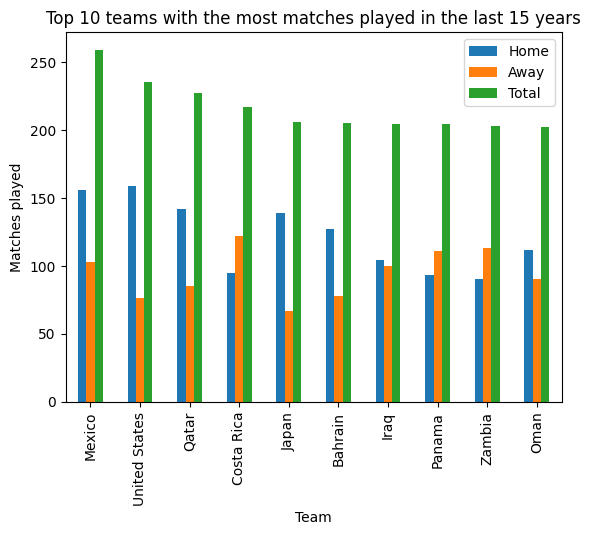

In [3]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Load the data from the CSV file into a Pandas DataFrame
data_file = '/content/gdrive/MyDrive/DataAnalysisTasks/Datasets/fifa_results.csv'
df = pd.read_csv(data_file)
# parsing dates
df['date'] = pd.to_datetime(df['date'],errors='coerce',format='%Y-%m-%d')
df['Year'] = df['date'].dt.year



# Calculate the mean away score by date
mean_away_score = df.groupby('date')['away_score'].mean()

# Filter the DataFrame to include only the last 15 years of data
last_year = df['Year'].max()
df_last_15_years = df[df['Year'] >= last_year - 14]

# Count the number of matches played by each home and away team
home_team_counts = df_last_15_years['home_team'].value_counts()
away_team_counts = df_last_15_years['away_team'].value_counts()

# Combine the counts into a single DataFrame
team_counts = pd.DataFrame({'Home': home_team_counts, 'Away': away_team_counts}).fillna(0)
team_counts['Total'] = team_counts['Home'] + team_counts['Away']

# Select the 10 teams with the most matches played
top_10_teams = team_counts.nlargest(10, 'Total')

# Plot the data as a bar chart
fig, ax = plt.subplots()
top_10_teams.plot.bar(stacked=False, ax=ax)

# Set the title and axis labels
ax.set_title('Top 10 teams with the most matches played in the last 15 years')
ax.set_xlabel('Team')
ax.set_ylabel('Matches played')

plt.show()